# Курсовая работа
## Датасет: [Facial Expression Recognition](https://paperswithcode.com/dataset/fer2013)
## Фундаментальные концепции ИИ 2024

#### Семин Александр Витальевич, М8О-109СВ-24



## О датасете

Используется для задач распознавания эмоций по лицам. Содержит 35887
изображений лиц, которые распределены на 7 категорий эмоций:

* Angry (злой)
* Disgust (отвращение)
* Fear (страх)
* Happy (счастье)
* Sad (грусть)
* Surprise (удивление)
* Neutral (нейтральное выражение)

Каждое изображение черно-белое, разрешение 48x48 пикселей. Датасет представлен
в формате csv и состоит из 2 колонок: эмоция (число от 0 до 6) и пиксели
(строка с интенсивностями пикселей от 0 до 255, разделенных пробелами).


Подключаем необходимые импорты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Загружаем датасет

In [2]:
!curl -L -o fer2013.zip https://www.kaggle.com/api/v1/datasets/download/deadskull7/fer2013

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 96.5M  100 96.5M    0     0  75.4M      0  0:00:01  0:00:01 --:--:--  156M


In [3]:
!unzip fer2013.zip -d fer2013

Archive:  fer2013.zip
  inflating: fer2013/fer2013.csv     


In [4]:
data = pd.read_csv('fer2013/fer2013.csv')

Выведем структуру датасета

In [5]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


Инициализируем список эмоций

In [6]:
emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

Пример изображения

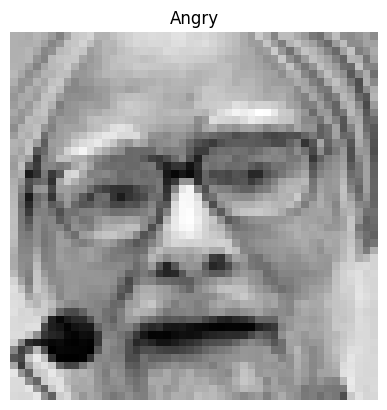

In [15]:
def plot_images(data):
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 3, 1)
    pixels = np.array(data.iloc[1, 1].split(), dtype='float32').reshape(48, 48)
    emotion = emotions[data.iloc[1, 0]]
    plt.imshow(pixels, cmap="gray")
    plt.title(emotion)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

plot_images(data)


Выведем распределение лиц по эмоциям

Распределение лиц по категориям эмоций
Всего: 35887
Happy: 8989 (25.05%)
Neutral: 6198 (17.27%)
Sad: 6077 (16.93%)
Fear: 5121 (14.27%)
Angry: 4953 (13.80%)
Surprise: 4002 (11.15%)
Disgust: 547 (1.52%)


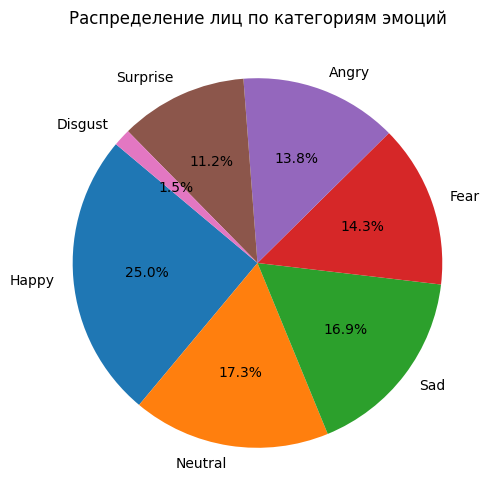

In [12]:
def emotion_distribution(data, emotions):
    emotion_counts = data['emotion'].value_counts()
    total = len(data)

    print('Распределение лиц по категориям эмоций')
    print(f'Всего: {total}')
    for i, count in emotion_counts.items():
        persentage = (count / total) * 100
        print(f'{emotions[i]}: {count} ({persentage:.2f}%)')

    emotion_percentages = (emotion_counts / total) * 100
    plt.figure(figsize=(8, 6))
    plt.pie(
        emotion_percentages,
        labels=[emotions[i] for i in emotion_percentages.index],
        autopct="%1.1f%%",
        startangle=140,
        colors=plt.cm.tab10.colors
    )
    plt.title('Распределение лиц по категориям эмоций')
    plt.show()

emotion_distribution(data, emotions)


## Обучение модели

Разделяем на обучающую и тестовую выборки

In [16]:
X = np.array([np.fromstring(pixels, dtype=int, sep=' ').reshape(48, 48, 1) for pixels in data["pixels"]]) / 255.0
y = to_categorical(data["emotion"], num_classes=7)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Создаем модель

In [17]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(emotions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Обучаем модель

In [18]:
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.1)

Epoch 1/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 205s 502ms/step - accuracy: 0.2686 - loss: 1.7849 - val_accuracy: 0.3988 - val_loss: 1.5516
Epoch 2/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 256s 488ms/step - accuracy: 0.4117 - loss: 1.5296 - val_accuracy: 0.4538 - val_loss: 1.4087
Epoch 3/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 200s 484ms/step - accuracy: 0.4615 - loss: 1.4007 - val_accuracy: 0.4821 - val_loss: 1.3522
Epoch 4/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 208s 499ms/step - accuracy: 0.4709 - loss: 1.3649 - val_accuracy: 0.5071 - val_loss: 1.3051
Epoch 5/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 195s 482ms/step - accuracy: 0.5034 - loss: 1.2986 - val_accuracy: 0.5152 - val_loss: 1.2759
Epoch 6/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 193s 479ms/step - accuracy: 0.5251 - loss: 1.2310 - val_accuracy: 0.5179 - val_loss: 1.2600
Epoch 7/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 195s 481ms/step - accuracy: 0.5456 - loss: 1.1880 - val_accuracy: 0.5284 - val_loss: 1.2344
Epoch 8/15
404/404 ━━━━━━━━━━━━━━━━━━━━ 204s 486ms/step - accuracy: 0.5544 -

Результаты обучения

225/225 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.5588 - loss: 1.2015
Точность на тестовых данных: 55.39%


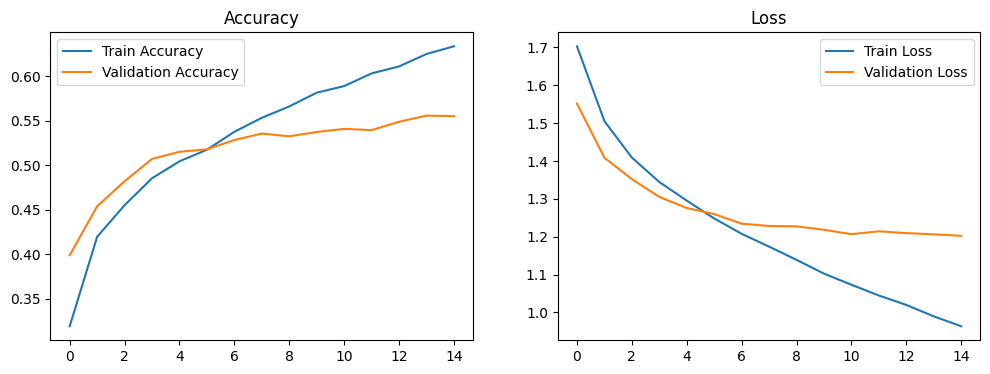

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Точность на тестовых данных: {test_accuracy * 100:.2f}%")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

## Примеры использования модели

In [22]:
def predict_emotion_from_file(image_path, model, emotions):
    img = Image.open(image_path).convert('L')
    img = img.resize((48, 48))
    img_array = np.array(img).reshape(1, 48, 48, 1) / 255.0

    prediction = model.predict(img_array)
    predicted_emotion = emotions[np.argmax(prediction)]

    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Emotion: {predicted_emotion}")
    plt.axis('off')
    plt.show()

    return predicted_emotion


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


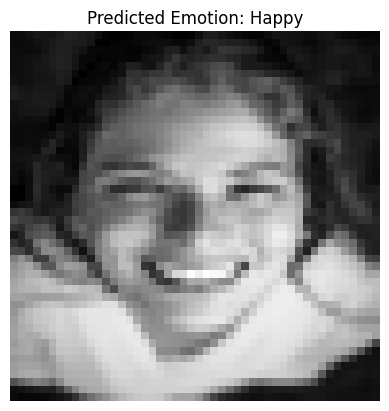

'Happy'

In [23]:
predict_emotion_from_file('smile.jpg', model, emotions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


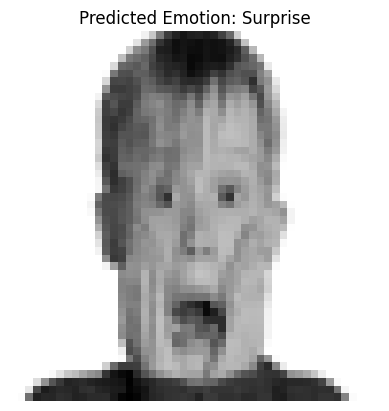

'Surprise'

In [27]:
predict_emotion_from_file('surprise.jpeg', model, emotions)

## Вывод

В рамках курсового проекта была разработана система для распознавания эмоций на изображениях с использованием методов глубокого обучения. Проведен анализ распределения лиц по категориям эмоций, что позволило визуализировать количество и процентное соотношение каждой категории. Построена сверточная нейронная сеть (CNN) для классификации эмоций, скомпилированная с использованием оптимизатора Adam и функции потерь categorical crossentropy. Оценка модели на тестовом наборе данных показала ее высокую эффективность, что потвердилось метриками точности и потерь.